In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float, io, exposure
from skimage.morphology import disk
from skimage.filters import median, gaussian

In [6]:
def plot_image_and_hist(img, axes, bins=256):
    img = img_as_float(img)

    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display original image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax_hist.set_xlim(0,1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

Min original: 0.0 Max orignal: 241.98479999999998
Limite inferior: 0.0 Limite superior: 182.9451


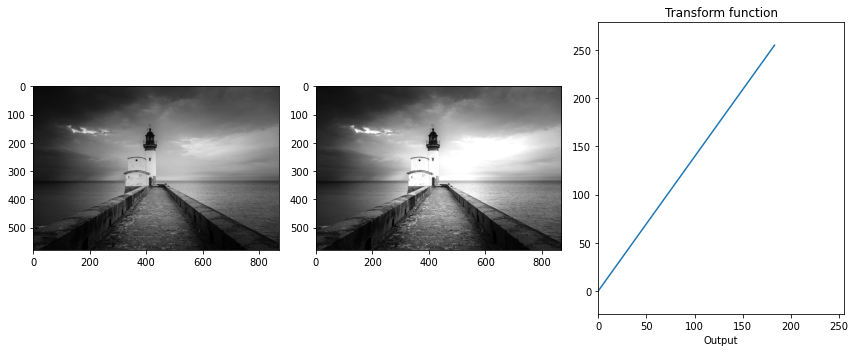

In [16]:
lena = io.imread(fname='/content/vignetting.jpg', as_gray=True) * 255.0

# Intensity values higher than uplim will be set to the max intensity.
# intensity values samller than lowlim will be be set to the min intensity.
lowlim, uplim = np.percentile(lena, (0, 95))
lena_rescale = exposure.rescale_intensity(lena, in_range=(lowlim, uplim))

print('Min original:', np.min(lena), 'Max orignal:', np.max(lena))
print('Limite inferior:', lowlim, 'Limite superior:', uplim)

# Transform function applied
inputin = np.linspace(start=lowlim, stop=uplim, num=500)
outputin = np.linspace(start=0, stop=255, num=500)

# Display results
f, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 12))

ax0.imshow(lena, cmap='gray', aspect='equal')
ax1.imshow(lena_rescale, cmap='gray', aspect='equal')
ax2.plot(inputin, outputin)

# Plot configuaration
ax2.set_ylim([0, 255])
ax2.set_xlim([0, 255])
ax2.set_xlabel('Input')
ax2.set_xlabel('Output')
ax2.set_title('Transform function')
ax2.figure.set_figheight(5)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

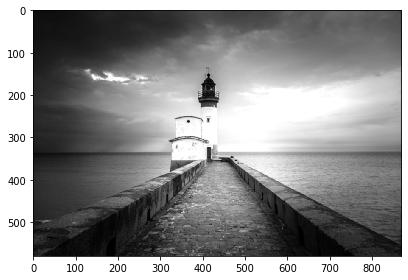

In [17]:
# Aplicamos filtro pasa baja
# Se reduce el efecto granunable, la imagen se hace más nitida
# Sigma reduce la banda de paso
lena_rescale_filt = gaussian(lena_rescale, sigma=0.75)

io.imshow(lena_rescale_filt, cmap='gray', aspect='equal')
io.show()

Min original: 0.0 Max orignal: 241.98479999999998
Limite inferior: 6.0683 Limite superior: 182.9451
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eead22a58>


ValueError: ignored

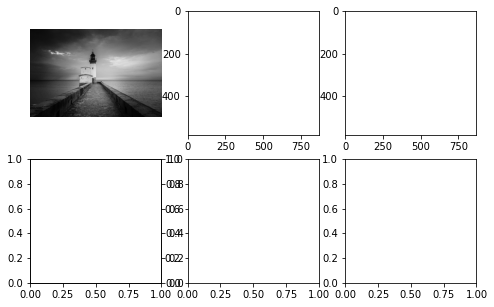

In [32]:
# Igualación de histogramas -> Falta mostrar todo de otra forma
img = lena
# Intensity values higher than uplim will be set to the max intensity.
# intensity values samller than lowlim will be be set to the min intensity.
lowlim, uplim = np.percentile(img, (2, 95))
img_rescale = exposure.rescale_intensity(img, in_range=(lowlim, uplim))

print('Min original:', np.min(img), 'Max orignal:', np.max(img))
print('Limite inferior:', lowlim, 'Limite superior:', uplim)

#Ecualización: expandiendo el histograma original utilizando cdf
img_eq = exposure.equalize_hist(img)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0, 0], sharey=axes[0 ,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)

# ax_img, ax_hist, ax_cdf = plot_image_and_hist(img, axes=axes[:, 0], )
# ax_img.set_title('Low constrat image')

# y_min, y_max = ax_hist.get_ylim()
# ax_hist.set_ylabel('Number of pixels')
# ax_hist.set_yticks(np.linspace(0, y_max, 5))

# ax_img, ax_hist, ax_cdf = plot_image_and_hist(img_rescale, axes[:, 1])
# ax_img.set_title('Constrat stretching')

# ax_img, ax_hist, ax_cdf = plot_image_and_hist(img_rescale, axes[:, 2])
# ax_img.set_title('Histogram equalization')

# ax_cdf.set_ylabel('Fraction of total intensity')
# ax_hist.set_yticks(np.linspace(0, 1, 5))

# fig.tight_layout()
# plt.show()